In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

data = pd.read_csv("C:/Users/UserName/Desktop/인공지능 개론/데이터 셋/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<h3>#데이터 타입, 결측값, 컬럼 확인</h3>

In [140]:
type(data)

pandas.core.frame.DataFrame

In [141]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [142]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<h3>#Outcome 제거</h3>

In [143]:
data = data.drop(['Outcome'], axis = 1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


<h3>#EDA 수행</h3>

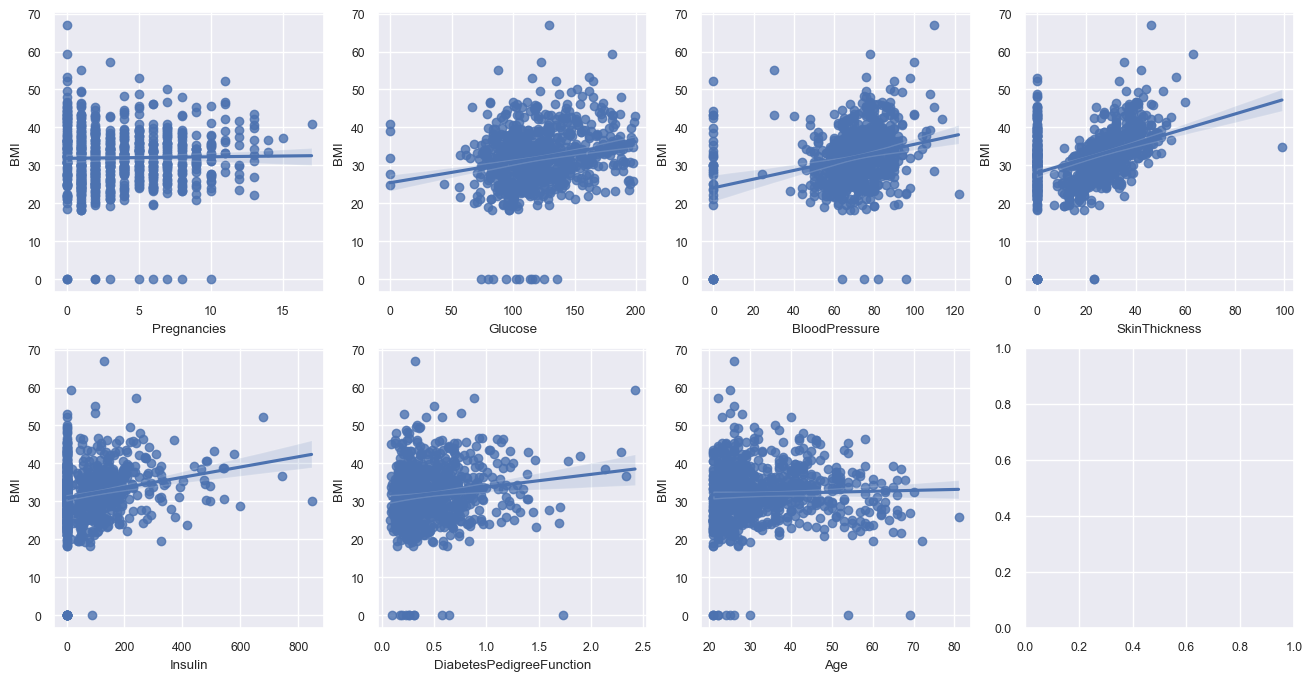

In [144]:
# 2x4 subplot 이용. axs는 4x2
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='BMI', data=data, ax=axs[row][col])

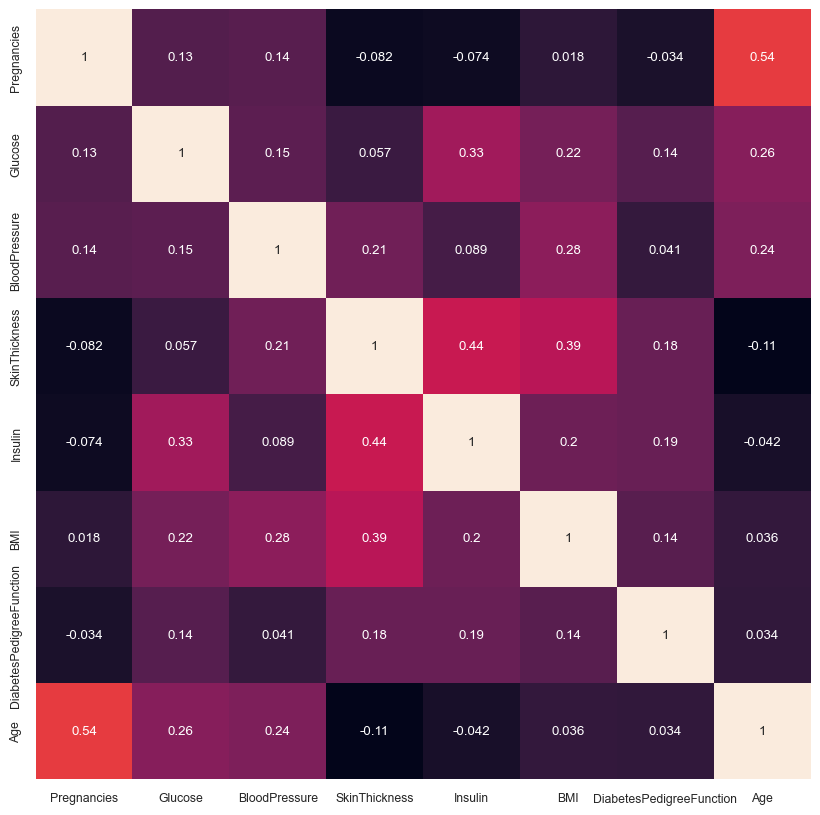

In [145]:
df_corr = data.corr()
#히트맵, 차원을 줄이기 위해서 숫자가 큰 column 4개만 넣어보자!
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

<h3>#데이터 나누기

In [146]:
Y = data['BMI']
Y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [147]:
X = data.drop(['BMI'], axis = 1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63
764,2,122,70,27,0,0.340,27
765,5,121,72,23,112,0.245,30
766,1,126,60,0,0,0.349,47


In [148]:
from sklearn.model_selection import train_test_split
X = X.iloc[:,0:7].values

In [149]:
X

array([[  6.   , 148.   ,  72.   , ...,   0.   ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,   0.   ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ..., 112.   ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,   0.   ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.   ,   0.315,  23.   ]])

In [150]:
X.shape

(768, 7)

In [151]:
Y.shape

(768,)

In [152]:

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [153]:
import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (7,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 64)                512       
                                                                 
 dense_40 (Dense)            (None, 32)                2080      
                                                                 
 dense_41 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [155]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 1064.1670 - mse: 1064.1670 - val_loss: 951.4608 - val_mse: 951.4608
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 974.6482 - mse: 974.6482 - val_loss: 860.4479 - val_mse: 860.4479
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 871.8927 - mse: 871.8927 - val_loss: 752.1631 - val_mse: 752.1631
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 749.1956 - mse: 749.1956 - val_loss: 625.5179 - val_mse: 625.5179
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 611.7569 - mse: 611.7569 - val_loss: 489.5247 - val_mse: 489.5247
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 466.7397 - mse: 466.7397 - val_loss: 352.1421 - val_mse: 352.1421
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 328.7162 - mse: 328.7162 - val_loss: 231.3049 - val_mse: 231.3049
Epoch 8/100
20/20 [=====

In [156]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 47.8649 - mse: 47.8649


[47.864906311035156, 47.864906311035156]

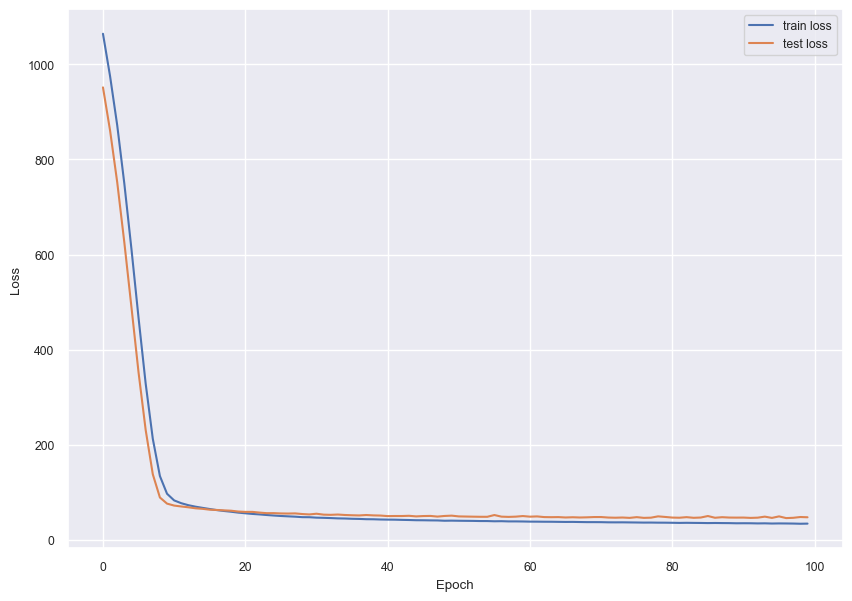

In [157]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()